# Exploring a dataset with xarray

In [2]:
import xarray as xr
import numpy as np
import cfgrib
from PIL import Image
import matplotlib.pyplot as plt

## 1. Opening a dataset from a GRIB file

In [5]:
# This errors because the grib file contains grib messages at different resolutions
# e.g. in ERA5, the ensemble usually has 0.5° x 0.5° resolution in latitude and longitude
# while the reference analysis has 0.25° x 0.25° resolution. This heterogeneity violates 
# the assumptions of the xarray data model (unique coordinate values).
GRIBS_FNAME = "weather_at_pressure_levels.grib"
ds = xr.open_dataset(GRIBS_FNAME, engine="cfgrib")

DatasetBuildError: multiple values for unique key, try re-open the file with one of:
    filter_by_keys={'dataType': 'em'}
    filter_by_keys={'dataType': 'an'}
    filter_by_keys={'dataType': 'es'}

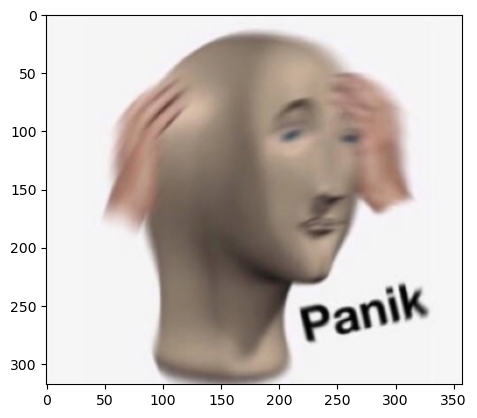

In [6]:
img = Image.open("img/panik.jpeg")
plt.imshow(img)

We can avoid this issue by filtering the grib file so that the filtered grib messages do not have multiple versions of a given coordinate. For example, here we filter by the `'dataType'` key, which for the `'em'` value selects the "ensemble members" 

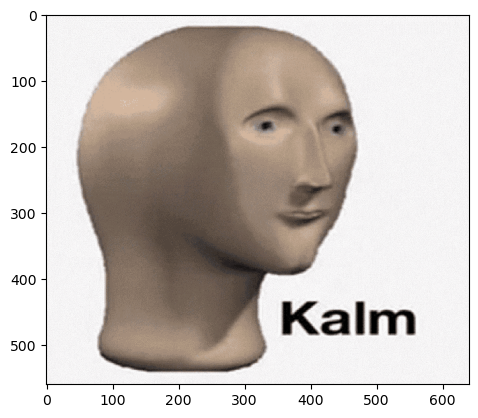

In [9]:
ds = xr.open_dataset(GRIBS_FNAME, engine="cfgrib", filter_by_keys={'dataType': 'em'})
img = Image.open("pics/kalm.gif")
plt.imshow(img)

Alternatively, we can use the `cfgrib` library directly to create as many xarray datasets as needed:

In [10]:
dss = cfgrib.open_datasets(GRIBS_FNAME)

## 2. Exploring the dataset

In [12]:
# Let's do some explotation on the second of these datasets:
# Use the widgets to see the attributes and the coordinate values
ds = dss[1]
ds

<xarray.Dataset>
Dimensions:        (number: 10, time: 24, isobaricInhPa: 37, latitude: 41,
                    longitude: 59)
Coordinates:
  * number         (number) int64 0 1 2 3 4 5 6 7 8 9
  * time           (time) datetime64[ns] 2023-09-01 ... 2023-09-03T21:00:00
    step           timedelta64[ns] 00:00:00
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 975.0 950.0 ... 3.0 2.0 1.0
  * latitude       (latitude) float64 50.0 49.5 49.0 48.5 ... 31.0 30.5 30.0
  * longitude      (longitude) float64 -18.0 -17.5 -17.0 ... 10.0 10.5 11.0
    valid_time     (time) datetime64[ns] 2023-09-01 ... 2023-09-03T21:00:00
Data variables:
    crwc           (number, time, isobaricInhPa, latitude, longitude) float32 ...
    z              (number, time, isobaricInhPa, latitude, longitude) float32 ...
    t              (number, time, isobaricInhPa, latitude, longitude) float32 ...
    u              (number, time, isobaricInhPa, latitude, longitude) float32 ...
    v              (number, time, isobaricInhPa, latitude, longitude) float32 ...
    q              (number, time, isobaricInhPa, latitude, longitude) float32 ...
    r              (number, time, isobaricInhPa, latitude, longitude) float32 ...
    clwc           (number, time, isobaricInhPa, latitude, longitude) float32 ...
    cc             (number, time, isobaricInhPa, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts

In [13]:
# Selecting a variable produces the corresponding DataArray
temperature = ds.t
temperature

<xarray.DataArray 't' (number: 10, time: 24, isobaricInhPa: 37, latitude: 41,
                       longitude: 59)>
[21480720 values with dtype=float32]
Coordinates:
  * number         (number) int64 0 1 2 3 4 5 6 7 8 9
  * time           (time) datetime64[ns] 2023-09-01 ... 2023-09-03T21:00:00
    step           timedelta64[ns] 00:00:00
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 975.0 950.0 ... 3.0 2.0 1.0
  * latitude       (latitude) float64 50.0 49.5 49.0 48.5 ... 31.0 30.5 30.0
  * longitude      (longitude) float64 -18.0 -17.5 -17.0 ... 10.0 10.5 11.0
    valid_time     (time) datetime64[ns] 2023-09-01 ... 2023-09-03T21:00:00
Attributes: (12/30)
    GRIB_paramId:                             130
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      2419
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           t
    GRIB_totalNumber:                         10
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

In [17]:
# Select dimension positionally and coordinate by index. Note that this operation 
# produces another DataArray with consistent coordinates. Note the implicit full slice
# on the final omitted dimension (longitude, in this case)
temperature[3,14,0,::2]

<xarray.DataArray 't' (latitude: 21, longitude: 59)>
[1239 values with dtype=float32]
Coordinates:
    number         int64 3
    time           datetime64[ns] 2023-09-02T18:00:00
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  float64 1e+03
  * latitude       (latitude) float64 50.0 49.0 48.0 47.0 ... 32.0 31.0 30.0
  * longitude      (longitude) float64 -18.0 -17.5 -17.0 ... 10.0 10.5 11.0
    valid_time     datetime64[ns] 2023-09-02T18:00:00
Attributes: (12/30)
    GRIB_paramId:                             130
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      2419
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           t
    GRIB_totalNumber:                         10
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

In [18]:
# Select dimension positionally and coordinate by value.
dt = np.datetime64("2023-09-03T06:00:00.000000000")
temperature.loc[3,dt,250.0]

<xarray.DataArray 't' (latitude: 41, longitude: 59)>
[2419 values with dtype=float32]
Coordinates:
    number         int64 3
    time           datetime64[ns] 2023-09-03T06:00:00
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  float64 250.0
  * latitude       (latitude) float64 50.0 49.5 49.0 48.5 ... 31.0 30.5 30.0
  * longitude      (longitude) float64 -18.0 -17.5 -17.0 ... 10.0 10.5 11.0
    valid_time     datetime64[ns] 2023-09-03T06:00:00
Attributes: (12/30)
    GRIB_paramId:                             130
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      2419
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           t
    GRIB_totalNumber:                         10
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

In [19]:
# Select dimension by name and coordinate by value
temperature.isel(isobaricInhPa=7, time=2, number=[1,2,7])

<xarray.DataArray 't' (number: 3, latitude: 41, longitude: 59)>
[7257 values with dtype=float32]
Coordinates:
  * number         (number) int64 1 2 7
    time           datetime64[ns] 2023-09-01T06:00:00
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  float64 825.0
  * latitude       (latitude) float64 50.0 49.5 49.0 48.5 ... 31.0 30.5 30.0
  * longitude      (longitude) float64 -18.0 -17.5 -17.0 ... 10.0 10.5 11.0
    valid_time     datetime64[ns] 2023-09-01T06:00:00
Attributes: (12/30)
    GRIB_paramId:                             130
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      2419
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           t
    GRIB_totalNumber:                         10
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

In [24]:
# Alternative version
d = {'isobaricInhPa': 7, 'time': 2, 'number': [1, 2, 7]}
temperature[d]

<xarray.DataArray 't' (number: 3, latitude: 41, longitude: 59)>
[7257 values with dtype=float32]
Coordinates:
  * number         (number) int64 1 2 7
    time           datetime64[ns] 2023-09-01T06:00:00
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  float64 825.0
  * latitude       (latitude) float64 50.0 49.5 49.0 48.5 ... 31.0 30.5 30.0
  * longitude      (longitude) float64 -18.0 -17.5 -17.0 ... 10.0 10.5 11.0
    valid_time     datetime64[ns] 2023-09-01T06:00:00
Attributes: (12/30)
    GRIB_paramId:                             130
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      2419
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           t
    GRIB_totalNumber:                         10
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

In [25]:
# Compare with the other .isel version
temperature.isel(isobaricInhPa=[7], time=2, number=[1,2,7])

<xarray.DataArray 't' (number: 3, isobaricInhPa: 1, latitude: 41, longitude: 59)>
[7257 values with dtype=float32]
Coordinates:
  * number         (number) int64 1 2 7
    time           datetime64[ns] 2023-09-01T06:00:00
    step           timedelta64[ns] 00:00:00
  * isobaricInhPa  (isobaricInhPa) float64 825.0
  * latitude       (latitude) float64 50.0 49.5 49.0 48.5 ... 31.0 30.5 30.0
  * longitude      (longitude) float64 -18.0 -17.5 -17.0 ... 10.0 10.5 11.0
    valid_time     datetime64[ns] 2023-09-01T06:00:00
Attributes: (12/30)
    GRIB_paramId:                             130
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      2419
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           t
    GRIB_totalNumber:                         10
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

In [27]:
# Select dimension by name and coordinate by value
temperature.sel(isobaricInhPa=300.0, latitude=45.0, longitude=11.0)

<xarray.DataArray 't' (number: 10, time: 24)>
[240 values with dtype=float32]
Coordinates:
  * number         (number) int64 0 1 2 3 4 5 6 7 8 9
  * time           (time) datetime64[ns] 2023-09-01 ... 2023-09-03T21:00:00
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  float64 300.0
    latitude       float64 45.0
    longitude      float64 11.0
    valid_time     (time) datetime64[ns] 2023-09-01 ... 2023-09-03T21:00:00
Attributes: (12/30)
    GRIB_paramId:                             130
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      2419
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           t
    GRIB_totalNumber:                         10
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

In [30]:
# With a dict (different coordinate selection):

d = {'isobaricInhPa': 300.0, 'latitude': 45.0, 'number': [1, 2, 7]}
temperature.loc[d]

<xarray.DataArray 't' (number: 3, time: 24, longitude: 59)>
[4248 values with dtype=float32]
Coordinates:
  * number         (number) int64 1 2 7
  * time           (time) datetime64[ns] 2023-09-01 ... 2023-09-03T21:00:00
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  float64 300.0
    latitude       float64 45.0
  * longitude      (longitude) float64 -18.0 -17.5 -17.0 ... 10.0 10.5 11.0
    valid_time     (time) datetime64[ns] 2023-09-01 ... 2023-09-03T21:00:00
Attributes: (12/30)
    GRIB_paramId:                             130
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      2419
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           t
    GRIB_totalNumber:                         10
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature